# A five minute intro to Thermobar
- For more information and examples, see the read-the-docs page. https://thermobar.readthedocs.io/en/latest/index.html, which has links to YouTube Videos.
- You can download the excel spreadsheet you need here: https://github.com/PennyWieser/Thermobar/blob/main/docs/Examples/Five_min_intro.xlsx,
click on the download button, and put in the same folder as this notebook
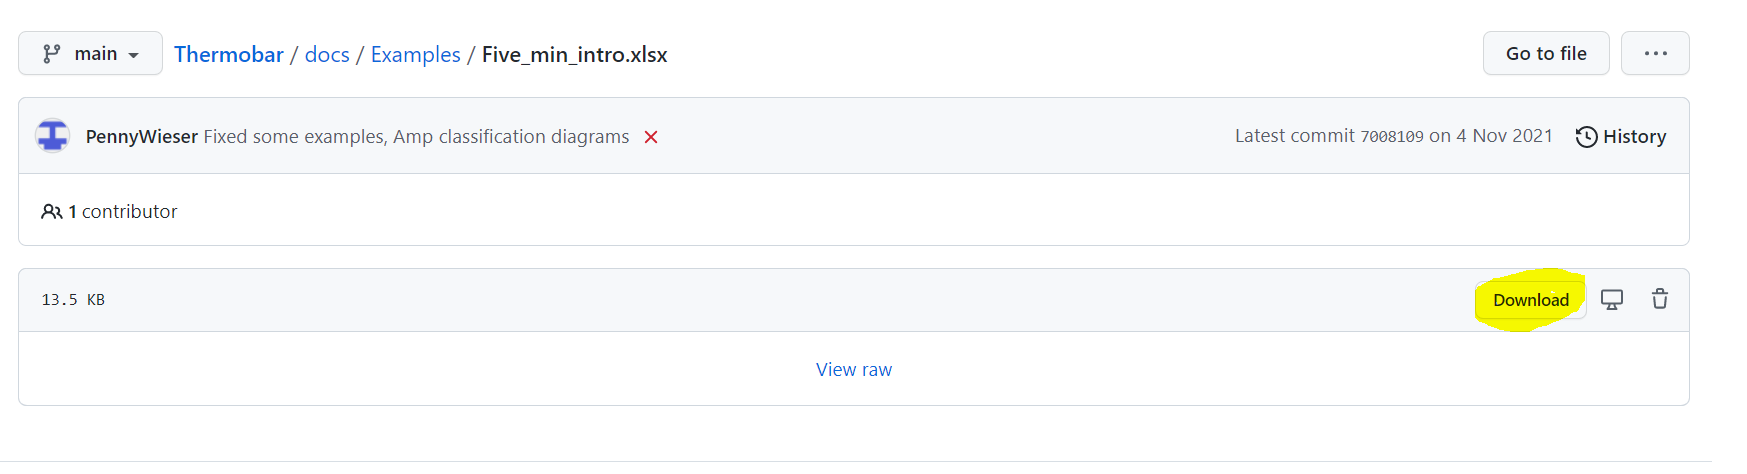

## 1 - Introduction 

Thermobar is a Python thermobarometry tool. It implements many thermometer and barometer calibrations for single phase (e.g., cpx oer amph) and melt-crystal equilibria (e.g., cpx-liq etc.) 

We recomending importing 3 essential python packages, pandas which allows data to be treated a bit like an excel spreadsheet (with column headings), numpy which does math operations, and matplotlib which does plotting. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## 2 - Installing and importing Thermobar
First, we install Thermobar using "pip", you only need to do this once on your computer (although you may wish to update as new features are added)

In [2]:
#!pip install Thermobar

Now we import the thermobarometry tool itself. this is imported as pt, so any time you want to call a function from Thermobar, you do pt.function_name

In [3]:
import Thermobar as pt

You can get the version (which you should state in a paper) using the following code

In [5]:
pt.__version__

'0.0.19dev'

## 3 - Load data from an Excel file
- Excel file is formatted with oxide names, followed by the phase (e.g., SiO2_Liq for the SiO2 content of the liquid, SiO2_Cpx for the Cpx). 
- In this case, it is reading the file named "Five_min_intro.xlsx", from Sheet1
- The import_excel function return a dictionary called "out", which is a collection of formatted dataframes, with one for each phase. /
- We can access these dictionaries using their "keys" within square brackets (i.e., 'Liqs' and' Cpxs') and extract 2 dataframes, which we call Liqs and Cpxs
- The order of headings doesn't matter. 
- You can also have any other columns, e.g., estimate of pressure from any other proxy (melt inclusions, geophysics), and anything else you might want to plot (e.g., latitude, longitude)

In [6]:
out=pt.import_excel('Five_min_intro.xlsx', sheet_name="Sheet1")
my_input=out['my_input']
Liqs=out['Liqs']
Cpxs=out['Cpxs']

The following are the phase identification names you should use when formatting an excel spreadsheet

Phase identification:
    <ul>
    <li>\_Liq: Liquid (the melt)</li>
    <li>\_Ol: olivine</li>
    <li>\_Cpx: clinopyroxene</li>
    <li>\_Plag: plagioclase</li>
    <li>\_Kspar: kfeldspar</li>
    <li>\_Opx: ortopyroxene</li>
    <li>\_Amp: amphibole</li>
    <li>\_Sp: spinel</li>
    <ul>
       

### 3b - Only 1 phase
- If you only have one phase, you can also skip the bit where you change the column names, and just state the phase name in the import function as suffix = " "...
- Here, we are reading from the sheet "Liq_noheader" to demonstrate this

In [7]:
out_noheads=pt.import_excel('Five_min_intro.xlsx', sheet_name="Liq_noheader", suffix="_Liq")
Liqs_noheads=out_noheads['Liqs']

## 4. Inspect data
- you should always inspect data to check it has read in correctly, and Thermobar has intepreted all the column headings how you wanted them.
- In particular, check that you have numbers in the FeOt column. If your heading was FeO, this may be empty. It needs to be FeOt in the user-inputted spreadsheet to avoid ambiguities with Fe partitioning
-  Sometimes your column headings may have funny characters due to use of spaces, subscripts etc. in journal pdf tables. Check that all the columns you entered have numbers. If, say your SiO2_Liq heading had funny characters, this column will be filled with zeros when you inspect it.
- by default, if you don't have a Sample_ID_phase column, but just a Sample_ID column, the Sample_ID column in each dataframes will be replaced with the index (E.g., 0, 1, 2, 3). 
- The head function shows the first 5 columns. Too look at more columns, remove .head()

In [8]:
display(Liqs.head())
display(Cpxs.head())

,SiO2_Liq,TiO2_Liq,Al2O3_Liq,FeOt_Liq,MnO_Liq,MgO_Liq,CaO_Liq,Na2O_Liq,K2O_Liq,Cr2O3_Liq,P2O5_Liq,H2O_Liq,Fe3Fet_Liq,NiO_Liq,CoO_Liq,CO2_Liq,Sample_ID_Liq
0,51.1,0.93,17.5,8.91,0.18,6.09,11.50,3.53,0.17,0,0.15,3.8,0.0,0.0,0.0,0.0,0
1,51.5,1.19,19.2,8.70,0.19,4.98,10.00,3.72,0.42,0,0.14,6.2,0.0,0.0,0.0,0.0,1
2,59.1,0.54,19.1,5.22,0.19,3.25,7.45,4.00,0.88,0,0.31,6.2,0.0,0.0,0.0,0.0,2
3,52.5,0.98,19.2,8.04,0.20,4.99,9.64,4.15,0.21,0,0.14,6.2,0.0,0.0,0.0,0.0,3
4,56.2,0.34,20.4,5.88,0.20,2.58,7.18,6.02,1.02,0,0.23,6.2,0.0,0.0,0.0,0.0,4


,SiO2_Cpx,TiO2_Cpx,Al2O3_Cpx,FeOt_Cpx,MnO_Cpx,MgO_Cpx,CaO_Cpx,Na2O_Cpx,K2O_Cpx,Cr2O3_Cpx,Sample_ID_Cpx
0,51.5,0.50,3.70,5.18,0.09,15.8,22.8,0.24,0,0.66,0
1,50.3,0.73,4.12,5.83,0.00,15.0,22.7,0.24,0,0.28,1
2,47.3,1.75,7.85,6.51,0.14,13.1,22.5,0.25,0,0.22,2
3,51.1,0.63,4.41,5.66,0.13,15.6,22.6,0.23,0,0.27,3
4,51.0,0.56,4.14,7.33,0.20,14.4,22.4,0.31,0,0.09,4


## 5 - Getting help

The <em>help()</em> method provide you relevant information about any function, e.g., here we want information on the function for calculating Cpx-Liq temperature:

In [9]:
help(pt.calculate_cpx_liq_temp)

Help on function calculate_cpx_liq_temp in module Thermobar.clinopyroxene_thermobarometry:

calculate_cpx_liq_temp(*, equationT, cpx_comps=None, liq_comps=None, meltmatch=None, P=None, eq_tests=False, H2O_Liq=None, Fe3Fet_Liq=None, sigma=1, Kd_Err=0.03)
    Clinopyroxene-Liquid thermometry, calculates temperature in Kelvin
    (and equilibrium tests as an option)
    
    Parameters
    -------
    cpx_comps: pandas.DataFrame
        Clinopyroxene compositions with column headings SiO2_Cpx, MgO_Cpx etc.
    
    liq_comps: pandas.DataFrame
        Liquid compositions with column headings SiO2_Liq, MgO_Liq etc.
    
    Or:
    
    meltmatch: pandas.DataFrame
        Combined dataframe of cpx-Liquid compositions
        Used for calculate_cpx_liq_press_temp_matching function.
    
    EquationT: str
        Choice of equation:
        Cpx-Liquid
        |  T_Put1996_eqT1  (P-indep, H2O-indep)
        |  T_Mas2013_eqTalk1  (P-indep, H2O-indep, alk adaption of T1)
        |  T_Brug2019  

### You can also get help on specific equations to find out what inputs they use:

In [10]:
help(pt.T_Put2008_eq33)

Help on function T_Put2008_eq33 in module Thermobar.clinopyroxene_thermobarometry:

T_Put2008_eq33(P, *, H2O_Liq, Mg_Number_Liq_NoFe3, Ca_Liq_cat_frac, Si_Liq_cat_frac, Ti_Liq_cat_frac, Na_Liq_cat_frac, K_Liq_cat_frac, EnFs, lnK_Jd_DiHd_liq_2003)
    Clinopyroxene-liquid  thermometer of Putirka (2008) Eq 33.
    :cite:`putirka2008thermometers`
    
    SEE=+-45°C (all data)



## 6 - Can perform calculations just for pressure if you know temperature
- For all functions, the form is calculate_phase1name_phase2name_press, or if its a single-phase barometer, calculate_phase1name_only_press
- Specify dataframes of phase compositions after _comps=, and specify equationP. If the barometer requires a temperature, you can enter it as a single value, or as a column (see Liquid folder for more info)

In [11]:
# Here performing calculations at 1300 K
Press_eq30_1300K=pt.calculate_cpx_liq_press(cpx_comps=Cpxs, liq_comps=Liqs, 
                            equationP="P_Put2008_eq30", T=1300)

## 7 - Similarly, for temperature at a known pressure
- Same as for press, but with the ending _temp instead, and equationT

In [12]:
# Here performing calculations at 5 kbar
Temp_eq33_5kbar=pt.calculate_cpx_liq_temp(cpx_comps=Cpxs, liq_comps=Liqs, 
                                          equationT="T_Put2008_eq33", P=5)

## 8 - If you don't know either P or T
- You can iterate an equation for pressure with an equation for temp for the more realistic situation where you don't know either

In [13]:
PT_iter_30_33=pt.calculate_cpx_liq_press_temp(cpx_comps=Cpxs, liq_comps=Liqs, 
                                            equationP="P_Put2008_eq30", equationT="T_Put2008_eq33")
PT_iter_30_33

,P_kbar_calc,T_K_calc
0,2.530914,1352.408784
1,1.786845,1290.151507
2,1.171520,1255.933868
3,2.143416,1292.669093
4,2.763538,1243.469600


In the example above, calculate_cpx_liq_press_temp iterates equation 30 from Putirka (2008) for P, and equation 33 from Putirka (2008) for temperature. The output is a panda's dataframe.

## 9 -  Can plot a very simple x-y diagram using matplotlib (loaded as plt)
- You take the dataframe name (i.e., PT_iter_30_31), and use square brackets to specify a certain column name

Text(0, 0.5, 'T (K)')

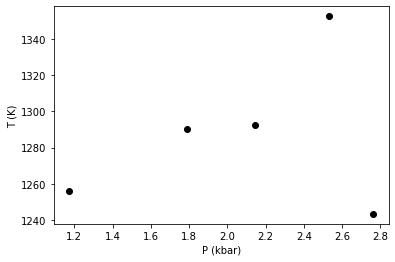

In [14]:
plt.plot(PT_iter_30_33['P_kbar_calc'], PT_iter_30_33['T_K_calc'], 'ok')
plt.xlabel('P (kbar)')
plt.ylabel('T (K)')

### 9b - If you want to plot Temperature in Celcius instead, you can simply subtract 273.15 from the dataframe:

Text(0, 0.5, 'T (C)')

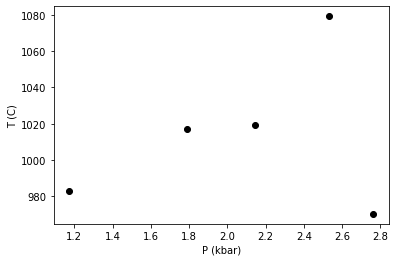

In [15]:
plt.plot(PT_iter_30_33['P_kbar_calc'], PT_iter_30_33['T_K_calc']-273.15, 'ok')
plt.xlabel('P (kbar)')
plt.ylabel('T (C)')

## 10 - Example of warnings for incorrect inputs
- Here, we read from the sheet "wrong_header_caps" to demonstrate what happens if the phase identifiers are lower case in the input spreadsheet.
- The function returns a warning, saying that it has found lower case names. It may be that you are using these for another purpose, but these are not recognised by the function.

In [16]:
out2=pt.import_excel('Five_min_intro.xlsx', sheet_name="wrong_header_caps")
Cpxs2=out2['Cpxs']

c:\users\penny\onedrive - oregon state university\postdoc\pymme\mybarometers\thermobar_outer\src\Thermobar\import_export.py:345: UserWarning: You've got a column heading with a lower case _cpx, this is okay if this column is for your own use, but if its an input to Thermobar, it needs to be capitalized (_Cpx)
  w.warn("You've got a column heading with a lower case _cpx, this is okay if this column is for your"
c:\users\penny\onedrive - oregon state university\postdoc\pymme\mybarometers\thermobar_outer\src\Thermobar\import_export.py:373: UserWarning: You've got a column heading with a lower case _liq, this is okay if this column is for your own use, but if its an input to Thermobar, it needs to be capitalized (_Liq)
  w.warn("You've got a column heading with a lower case _liq, this is okay if this column is for your"


- By inspecting the dataframes extracted from this input, you can see that Thermobar couldnt find any relevant column headings as all the columns except the sample ID are 0. 
This is why we recomend users always inspect dataframes before proceeding to calculations!

In [17]:
display(Cpxs2.head())

,SiO2_Cpx,TiO2_Cpx,Al2O3_Cpx,FeOt_Cpx,MnO_Cpx,MgO_Cpx,CaO_Cpx,Na2O_Cpx,K2O_Cpx,Cr2O3_Cpx,Sample_ID_Cpx
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4


## 11 - Example of Error when you don't have an FeOt column...
- Here, we load from the sheet "no_feot", which only has a heading FeO.
- This returns an error telling you to go make an FeOt column.

In [18]:
out3=pt.import_excel('Five_min_intro.xlsx', sheet_name="no_feot")
Liqs3=out3['Liqs']

ValueError: No FeOt found. You've got a column heading with FeO. To avoid errors based on common EPMA outputs thermobar only recognises columns with FeOt for all phases except liquid where you can also enter a Fe3Fet_Liq heading used for equilibrium tests